<a href="https://colab.research.google.com/github/ranesh88/ranesh_data-science/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM,Dense, Dropout,Embedding, SimpleRNN,GRU
from tensorflow.keras.models import Sequential

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
imdb=pd.read_csv("review.csv")

In [ ]:
# imdb
imdb.head()

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0


In [ ]:
imdb.shape

(999, 3)

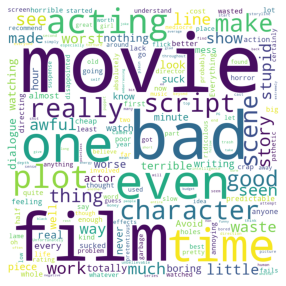

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(''.join(imdb[imdb["sentiment"]==0]["review"]))
  
plt.figure(figsize = (5,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

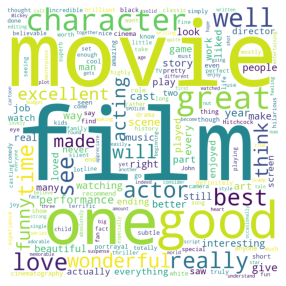

In [ ]:
wc = WordCloud(width = 800, height = 800, 
              background_color ='white',  
              min_font_size = 10)

wc.generate(''.join(imdb[imdb["sentiment"]==1]["review"]))
  
plt.figure(figsize = (5,5)) 
plt.imshow(wc) 
plt.axis("off") 
plt.show()

In [ ]:
imdb_train,imdb_test=train_test_split(imdb,test_size=0.2,random_state=2)

In [ ]:
x_train=imdb_train['review']
y_train=imdb_train['sentiment']
x_test=imdb_test['review']
y_test=imdb_test['sentiment']

In [ ]:
sent_lens=[]
for sent in imdb_train['review']:
    sent_lens.append(len(word_tokenize(sent)))
imdb_train['sent_len'] = sent_lens
imdb_train.head()    

/home/sukamal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,review,sentiment,sent_len
175,175,Artless camera-work endlessly presents us with...,0,13
818,818,The characters are fleshed out surprisingly we...,1,41
677,677,This is an excellent film.,1,6
951,951,It presents a idyllic yet serious portrayal of...,1,17
200,200,The movie I received was a great quality film ...,1,14


In [ ]:
max(sent_lens)

80

(array([192., 288., 169.,  82.,  36.,  22.,   5.,   1.,   2.,   2.]),
 array([ 1. ,  8.9, 16.8, 24.7, 32.6, 40.5, 48.4, 56.3, 64.2, 72.1, 80. ]),
 <BarContainer object of 10 artists>)

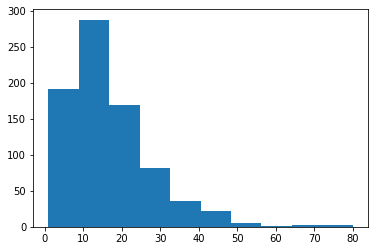

In [ ]:
plt.hist(sent_lens)

In [ ]:
# sent_lens

In [ ]:
np.quantile(sent_lens,0.95)

38.09999999999991

In [ ]:
# We can see that 95% review text are of lengths less than or equal to 37. We'll keep the max length to 30

In [ ]:
max_len = 38

In [ ]:
# Tokenization
tok = Tokenizer(char_level=False,split=' ')

tok.fit_on_texts(x_train)

In [ ]:
tok.index_word

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'is',
 6: 'this',
 7: 'i',
 8: 'it',
 9: 'to',
 10: 'in',
 11: 'movie',
 12: 'was',
 13: 'film',
 14: 'that',
 15: 'for',
 16: 'as',
 17: 'but',
 18: 'with',
 19: 'one',
 20: 'on',
 21: 'are',
 22: 'bad',
 23: 'not',
 24: 'you',
 25: "it's",
 26: 'just',
 27: 'very',
 28: 'good',
 29: 'so',
 30: 'all',
 31: 'be',
 32: 'at',
 33: 'an',
 34: 'there',
 35: 'by',
 36: 'from',
 37: 'about',
 38: 'like',
 39: 'his',
 40: 'really',
 41: 'out',
 42: 'have',
 43: 'time',
 44: 'even',
 45: 'great',
 46: 'who',
 47: 'were',
 48: 'has',
 49: 'if',
 50: 'or',
 51: 'he',
 52: 'my',
 53: 'characters',
 54: 'no',
 55: 'acting',
 56: 'well',
 57: 'see',
 58: 'how',
 59: 'most',
 60: '10',
 61: 'some',
 62: 'only',
 63: 'movies',
 64: 'when',
 65: 'more',
 66: 'plot',
 67: 'also',
 68: 'ever',
 69: 'best',
 70: 'your',
 71: 'story',
 72: 'its',
 73: 'made',
 74: 'watching',
 75: 'her',
 76: 'way',
 77: 'love',
 78: 'could',
 79: 'they',
 80: 'me',
 81: 'do',


In [ ]:
vocab_len = len(tok.index_word)
vocab_len

2718

In [ ]:
sequences_train = tok.texts_to_sequences(x_train)

In [ ]:
sequences_train

[[1007, 276, 107, 1008, 423, 335, 18, 1, 1009, 607, 608, 7, 1010],
 [1,
  53,
  21,
  1011,
  41,
  424,
  56,
  277,
  1012,
  2,
  1013,
  2,
  30,
  1,
  97,
  1014,
  126,
  1015,
  1016,
  278,
  18,
  26,
  1,
  127,
  336,
  4,
  1017,
  1018,
  10,
  1019,
  9,
  82,
  1,
  140,
  112,
  279,
  2,
  1020],
 [6, 5, 33, 118, 13],
 [8, 423, 3, 1021, 280, 337, 425, 4, 1, 609, 2, 1022, 4, 1, 53, 610],
 [1, 11, 7, 611, 12, 3, 45, 612, 13, 15, 25, 338],
 [1023,
  1024,
  281,
  2,
  613,
  426,
  2,
  24,
  42,
  3,
  45,
  89,
  242,
  209,
  126,
  339,
  40,
  56],
 [6, 5, 141, 3, 340, 2, 108, 11],
 [6, 11, 5, 3, 282, 614, 4, 3, 22, 66, 2, 3, 27, 27, 22, 341, 30, 1, 76],
 [2,
  49,
  14,
  427,
  163,
  4,
  3,
  428,
  4,
  3,
  11,
  15,
  24,
  1,
  429,
  5,
  67,
  1025,
  18,
  3,
  1026,
  430,
  4,
  615,
  431,
  2,
  1027,
  1028],
 [7, 283, 616, 1, 164, 43, 7, 182, 8, 29, 7, 83, 128, 8, 15, 1029],
 [3, 28, 1030, 4, 1031, 77, 2, 617, 3, 13, 142, 243],
 [1,
  109,
  84,
  

In [ ]:
sequences_matrix_train = sequence.pad_sequences(sequences_train,maxlen=max_len)

In [ ]:
sequences_matrix_train

array([[   0,    0,    0, ...,  608,    7, 1010],
       [   1,   53,   21, ...,  279,    2, 1020],
       [   0,    0,    0, ...,   33,  118,   13],
       ...,
       [   0,    0,    0, ..., 2713,  756,  265],
       [   0,    0,    0, ...,    5,  521,   80],
       [   0,    0,    0, ...,    4,  334, 2718]], dtype=int32)

In [ ]:
sequences_matrix_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 1007,  276,  107, 1008,  423,  335,   18,    1,
       1009,  607,  608,    7, 1010], dtype=int32)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_len+1,500,input_length=max_len,mask_zero=True))
#model.add(SimpleRNN(32,activation='tanh'))
#model.add(LSTM(64,activation='relu'))
model.add(GRU(64,activation='relu'))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 38, 500)           1359500   
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                108672    
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,470,285
Trainable params: 1,470,285
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#model = tf.keras.model.Sequential([
    
#    tf.keras.layers.Dense(8,activation=""),
#    tf.keras.layers.Dense(8,activation="")
    
#])

#model = Sequential()
#model.add(Dense(8,activation=""))
#model.add(Dense(8,activation=""))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(sequences_matrix_train,y_train.values,batch_size=50,
          epochs=50)

Train on 799 samples
Epoch 1/50
799/799 [==============================] - 3s 4ms/sample - loss: 0.6910
Epoch 2/50
799/799 [==============================] - 1s 1ms/sample - loss: 0.6708
Epoch 3/50
799/799 [==============================] - 1s 1ms/sample - loss: 0.6108
Epoch 4/50
799/799 [==============================] - 1s 1ms/sample - loss: 0.3703
Epoch 5/50
799/799 [==============================] - 1s 1ms/sample - loss: 0.1315
Epoch 6/50
799/799 [==============================] - 1s 1ms/sample - loss: 0.2520
Epoch 7/50
799/799 [==============================] - 1s 1ms/sample - loss: 0.1142
Epoch 8/50
799/799 [==============================] - 1s 1ms/sample - loss: 0.0754
Epoch 9/50
799/799 [==============================] - 1s 1ms/sample - loss: 0.0410
Epoch 10/50
799/799 [==============================] - 1s 1ms/sample - loss: 0.0280
Epoch 11/50
799/799 [==============================] - 1s 1ms/sample - loss: 0.0182
Epoch 12/50
799/799 [==============================] - 1s 1ms/sa

In [ ]:
sequences_matrix_test = sequence.pad_sequences(tok.texts_to_sequences(x_test),maxlen=max_len)

In [ ]:
sequences_matrix_test

array([[   0,    0,    0, ...,   25,  673,  646],
       [   0,    0,    0, ...,   21,   27,   28],
       [   0,    0,    0, ...,   47,   79,  715],
       ...,
       [   0,    0,    0, ...,    3, 1219, 1998],
       [   0,    0,    0, ...,  383,   15,  121],
       [   0,    0,    0, ...,   62,    1,   13]], dtype=int32)

In [ ]:
y_pred=model.predict(sequences_matrix_test)

In [ ]:
y_pred = np.where(y_pred>=0.5,1,0)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       109
           1       0.75      0.75      0.75        91

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.77      0.77      0.77       200



In [ ]:
#################################################################

In [ ]:
class Perceptron:
    
    def __init__(self,x1,x2):
        self.x1 = x1
        self.x2 = x2
        
    def forward_prop(self):
        
        w1 = 10
        w2 = 20
        threshold = 10
        
        output = w1*self.x1 + w2*self.x2
        
        if output >= threshold:
            return 1
        else:
            return 0       
        

In [ ]:
p = Perceptron(11,12)

In [ ]:
p.forward_prop()

1